# Titans vs Jaguars Week 14

# Introduction

Do an animation of the Titans longest pass play during the 2018 season.

Main focus:
* Have the animation of players circle moving around the field

Additional:
* Have arrows showing which way each player is moving
* Read about field control and what it accomplishes ([Big Data Bowl Submission](https://www.kaggle.com/adamsonty/nfl-big-data-bowl-a-basic-field-control-model))

In [39]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import animation
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', None)

In [40]:
games = pd.read_csv("games.csv")
print(games.shape)
print(games.columns)
games.head()

(253, 6)
Index(['gameId', 'gameDate', 'gameTimeEastern', 'homeTeamAbbr',
       'visitorTeamAbbr', 'week'],
      dtype='object')


,gameId,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week
0,2018090600,09/06/2018,20:20:00,PHI,ATL,1
1,2018090901,09/09/2018,13:00:00,CLE,PIT,1
2,2018090902,09/09/2018,13:00:00,IND,CIN,1
3,2018090903,09/09/2018,13:00:00,MIA,TEN,1
4,2018090900,09/09/2018,13:00:00,BAL,BUF,1


I know I want to visualize a big play from the Titans' 2018 season, but I do not know from which game I want to choose. Thus, I will just see who they played in this season and go from there.

In [41]:
titans_schedule = games[(games['homeTeamAbbr']=='TEN') | (games['visitorTeamAbbr']=='TEN')]
titans_schedule

,gameId,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week
3,2018090903,09/09/2018,13:00:00,MIA,TEN,1
21,2018091607,09/16/2018,13:00:00,TEN,HOU,2
32,2018092304,09/23/2018,13:00:00,JAX,TEN,3
52,2018093007,09/30/2018,13:00:00,TEN,PHI,4
62,2018100700,10/07/2018,13:00:00,BUF,TEN,5
87,2018101411,10/14/2018,16:25:00,TEN,BAL,6
91,2018102100,10/21/2018,09:30:00,LAC,TEN,7
130,2018110500,11/05/2018,20:15:00,DAL,TEN,9
139,2018111108,11/11/2018,13:00:00,TEN,NE,10
150,2018111804,11/18/2018,13:00:00,IND,TEN,11


Now I will try to find a big play from the Titans in 2018. This data is from the big data bowl which focused on how well defenders played the pass so the big play will have to be a pass play. I will see what results I get for pass plays greater than 50 yards.

In [42]:
plays = pd.read_csv("plays.csv")
print(plays.shape)
print(plays.columns)
plays.head()

(19239, 27)
Index(['gameId', 'playId', 'playDescription', 'quarter', 'down', 'yardsToGo',
       'possessionTeam', 'playType', 'yardlineSide', 'yardlineNumber',
       'offenseFormation', 'personnelO', 'defendersInTheBox',
       'numberOfPassRushers', 'personnelD', 'typeDropback',
       'preSnapVisitorScore', 'preSnapHomeScore', 'gameClock',
       'absoluteYardlineNumber', 'penaltyCodes', 'penaltyJerseyNumbers',
       'passResult', 'offensePlayResult', 'playResult', 'epa',
       'isDefensivePI'],
      dtype='object')


,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,offenseFormation,personnelO,defendersInTheBox,numberOfPassRushers,personnelD,typeDropback,preSnapVisitorScore,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,SINGLEBACK,"1 RB, 1 TE, 3 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,13:10:00,49.0,NaN,NaN,I,0,0,-0.372360,False
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,SHOTGUN,"2 RB, 1 TE, 2 WR",6.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,13:05:00,49.0,NaN,NaN,I,0,0,-0.702779,False
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,5.0,"4 DL, 1 LB, 6 DB",SCRAMBLE_ROLLOUT_LEFT,0.0,0.0,13:01:00,49.0,NaN,NaN,C,33,33,3.047530,False
4,2018090600,256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,ATL,play_type_pass,PHI,1,SHOTGUN,"2 RB, 3 TE, 0 WR",8.0,6.0,"6 DL, 3 LB, 2 DB",TRADITIONAL,0.0,0.0,10:59:00,11.0,NaN,NaN,I,0,0,-0.842272,False


In [43]:
titans_big = plays[(plays['possessionTeam']=='TEN') & (plays['offensePlayResult']>50)]
print(titans_big.shape)
print(titans_big.loc[:,'playDescription'].iloc[0])
titans_big.sort_values(by='offensePlayResult', ascending=False)

(4, 27)
(10:00) (Punt formation) K.Byard pass deep right to D.Cruikshank for 66 yards, TOUCHDOWN.


,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,offenseFormation,personnelO,defendersInTheBox,numberOfPassRushers,personnelD,typeDropback,preSnapVisitorScore,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
1647,2018091607,329,(10:00) (Punt formation) K.Byard pass deep rig...,1,4,6,TEN,play_type_pass,TEN,34,NaN,"0 RB, 2 TE, 0 WR,1 P,3 LB,1 LS,4 DB",NaN,5.0,"0 DL, 3 LB, 4 DB, 3 RB,1 QB",UNKNOWN,0.0,0.0,10:00:00,44.0,NaN,NaN,C,66,66,8.397043,False
12866,2018112600,377,(9:31) M.Mariota pass short middle to J.Smith ...,1,2,2,TEN,play_type_pass,TEN,39,SINGLEBACK,"1 RB, 3 TE, 1 WR",7.0,5.0,"4 DL, 3 LB, 4 DB",TRADITIONAL,3.0,0.0,09:31:00,71.0,NaN,NaN,C,61,61,5.446971,False
13778,2018120211,3538,(7:22) (Shotgun) M.Mariota pass deep left to T...,4,1,10,TEN,play_type_pass,TEN,35,SHOTGUN,"1 RB, 1 TE, 3 WR",7.0,4.0,"2 DL, 4 LB, 5 DB",TRADITIONAL,22.0,16.0,07:22:00,45.0,NaN,NaN,C,55,55,3.340939,False
4081,2018093007,3138,(7:55) M.Mariota pass deep middle to C.Davis t...,4,1,10,TEN,play_type_pass,TEN,25,SINGLEBACK,"1 RB, 2 TE, 2 WR",8.0,4.0,"4 DL, 3 LB, 4 DB",TRADITIONAL,17.0,13.0,07:55:00,35.0,NaN,NaN,C,51,51,2.971368,False


The longest pass play that the Titans had in the 2018 season was from a fake punt. This is about to get weird because this will look interesting in the animation. That's great! Now I need to get the information about the week from which it happened.

In [44]:
game_num = titans_big['gameId'].iloc[0]

titans_schedule[titans_schedule['gameId']==game_num]

,gameId,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week
21,2018091607,09/16/2018,13:00:00,TEN,HOU,2


This play happened in week 2, so I will be using the week 2 data set and filtering by the game and play ID number to get all of the frames for this play.

In [45]:
wk2 = pd.read_csv("week2.csv")
wk2.head()

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
0,2018-09-14T00:23:24.700Z,29.73,26.60,0.00,0.00,0.00,81.40,98.80,None,382.0,Joe Flacco,5.0,QB,1,away,2018091300,60,right,NaN
1,2018-09-14T00:23:24.700Z,33.93,18.95,0.00,0.00,0.00,93.25,10.24,None,71269.0,Michael Crabtree,15.0,WR,1,away,2018091300,60,right,IN
2,2018-09-14T00:23:24.700Z,35.95,7.00,0.04,0.03,0.01,286.14,136.27,None,2533060.0,Dre Kirkpatrick,27.0,CB,1,home,2018091300,60,right,NaN
3,2018-09-14T00:23:24.700Z,44.51,36.03,0.77,0.67,0.08,264.78,322.29,None,2539233.0,Shawn Williams,36.0,SS,1,home,2018091300,60,right,NaN
4,2018-09-14T00:23:24.700Z,37.79,14.66,0.28,0.53,0.03,268.29,255.08,None,2543474.0,Darqueze Dennard,21.0,CB,1,home,2018091300,60,right,NaN


In [46]:
fk_punt = wk2[wk2['playId']==329]
print(fk_punt.shape)
fk_punt.head()

(2277, 19)


,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
134205,2018-09-16T17:13:17.099Z,42.38,28.55,0.11,0.06,0.01,54.13,171.81,None,2354.0,Wesley Woodyard,59.0,ILB,1,home,2018091607,329,right,NaN
134206,2018-09-16T17:13:17.099Z,30.10,29.50,0.12,0.06,0.02,80.53,143.28,None,4263.0,Brett Kern,6.0,P,1,home,2018091607,329,right,NaN
134207,2018-09-16T17:13:17.099Z,45.38,26.99,0.68,0.23,0.08,272.12,64.71,None,1037347.0,Joe Webb,5.0,QB,1,away,2018091607,329,right,NaN
134208,2018-09-16T17:13:17.099Z,42.13,31.77,0.22,0.10,0.04,90.18,212.48,None,2495234.0,Luke Stocker,88.0,TE,1,home,2018091607,329,right,NaN
134209,2018-09-16T17:13:17.099Z,44.96,24.16,0.12,0.02,0.02,281.44,230.85,None,2495251.0,Shareece Wright,43.0,CB,1,away,2018091607,329,right,NaN


I am just going to plot the first frame to see what the formation looks like for both teams.

(23, 19)


<ipython-input-47-cfc795f69b83>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame1['teamName'] = teamName


<AxesSubplot:xlabel='x', ylabel='y'>

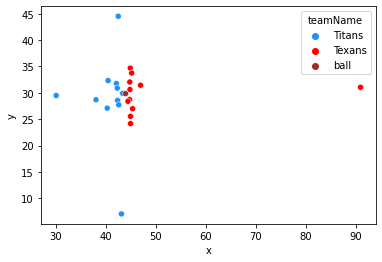

In [47]:
frame1 = fk_punt[fk_punt['frameId']==1]
print(frame1.shape)

teamName = []
for i in frame1['team']:
    if i == 'home':
        teamName.append('Titans')
    elif i == 'away':
        teamName.append('Texans')
    else:
        teamName.append('ball')
        
frame1['teamName'] = teamName 

sns.scatterplot(data=frame1, x='x', y='y', hue='teamName',palette=['dodgerblue', 'red', 'brown'])

I am going to only take variables that are necessary to create the animation and potentially create a field control model.

In [51]:
nec_vars = ['x', 'y', 's', 'dir', 'event', 'displayName', 'jerseyNumber', 'frameId', 'team', 'teamName']

teamName = []
for i in fk_punt['team']:
    if i == 'home':
        teamName.append('Titans')
    elif i == 'away':
        teamName.append('Texans')
    else:
        teamName.append('ball')
        
fk_punt['teamName'] = teamName 

fk_punt = fk_punt.loc[:, nec_vars]
fk_punt.head()

,x,y,s,dir,event,displayName,jerseyNumber,frameId,team,teamName
134205,42.38,28.55,0.11,171.81,None,Wesley Woodyard,59.0,1,home,Titans
134206,30.10,29.50,0.12,143.28,None,Brett Kern,6.0,1,home,Titans
134207,45.38,26.99,0.68,64.71,None,Joe Webb,5.0,1,away,Texans
134208,42.13,31.77,0.22,212.48,None,Luke Stocker,88.0,1,home,Titans
134209,44.96,24.16,0.12,230.85,None,Shareece Wright,43.0,1,away,Texans


Sonty's [Big Data Bowl Submission](https://www.kaggle.com/adamsonty/nfl-big-data-bowl-a-basic-field-control-model) brings up the fact that x and y coordinates are cartesian while directional coordinates (`s`, `dir`) are polar.